<!DOCTYPE html>
<html>
<head>
</head>
    <body>
        <h6>ÁREAS</h6>
         <div>
     <table>
      <thead>
       <th>área</th>   
       <th>latitude inicial</th>
       <th>latitude final</th>
       <th>longitude inicial</th>
       <th>longitude final</th>
      </thead>
      <tbody>
       <td>South American</td>   
       <td>-36</td>
       <td>0</td>
       <td>280</td>
       <td>325</td>   
      </tbody>
      <tbody>
       <td>La Plata</td>
       <td>-36</td>
       <td>-24</td>
       <td>295</td>
       <td>315</td>
      </tbody>
      <tbody>
       <td>Southeast</td>
       <td>-24</td>
       <td>-12</td>
       <td>310</td>
       <td>325</td>
      </tbody>
      <tbody>
       <td>Central West</td>
       <td>-24</td>
       <td>-12</td>
       <td>295</td>
       <td>310</td> 
      </tbody>
      <tbody>
       <td>Northeast</td>
       <td>-12</td>
       <td>0</td>
       <td>310</td>
       <td>325</td> 
      </tbody>
      <tbody>
       <td>Amazon</td>
       <td>-12</td>
       <td>0</td>
       <td>295</td>
       <td>310</td> 
      </tbody>
     </table>
    </div>
    </body>
</html>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from netCDF4 import Dataset
import xarray as xr

In [2]:
from matplotlib import pylab

sns.set()
#sns.set(style="whitegrid", color_codes=True)

In [3]:
%matplotlib inline

In [4]:
path = "/home/wanderson/Documentos/ncl/"

In [5]:
DS_NCEP = xr.open_dataset(path +'MAY2015_24Z_12Z_NCEP.nc')


In [6]:
DS_NCEP.variables['lat'][79:-89]

<xarray.IndexVariable 'lat' (lat: 282)>
array([-58.13535, -57.73579, -57.33624, ...,  53.34069,  53.74024,  54.1398 ])
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y

In [12]:
#DS_NCEP.prec.mean(dim=['lon','lat'])
ts = DS_NCEP.prec[0:24,0:-36,280:325].mean(dim=['lon','lat'])
ts.data
#ts.data.mean()
ts = ts.load()
ts

<xarray.DataArray 'prec' (time: 24)>
array([2.393445, 1.655049, 1.640773, 2.24579 , 1.793684, 3.091357, 4.05642 ,
            nan, 2.43012 , 2.484431, 2.753012, 2.133802, 2.389328, 2.336836,
       2.076838, 2.362289, 2.139344, 2.805023, 3.863662, 3.18697 , 3.079626,
       2.840413, 2.759321, 2.384962], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2015-05-01T12:00:00 ... 2015-05-24T12:00:00

/home/wanderson/anaconda3/envs/jupyterlab_env/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


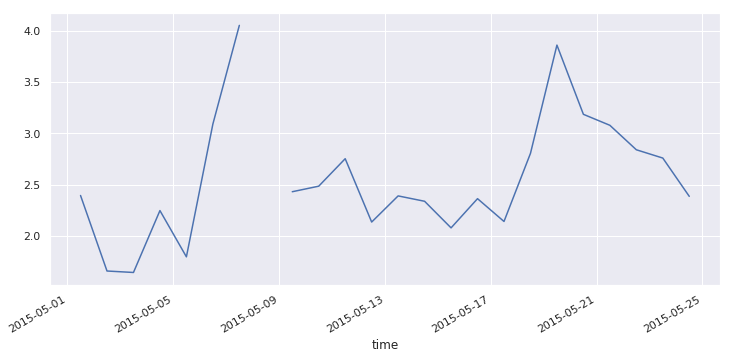

In [13]:
pylab.rcParams['figure.figsize'] = (12,5)
ts.plot();
ts.rolling(time=25, center=True).mean().plot();

In [14]:
GPM = xr.open_dataset(path +'GPM_REC_ACUM_24h_grib2.nc')

In [15]:
GPM.variables['latitude'][:]

<xarray.IndexVariable 'latitude' (latitude: 702)>
array([-57.05, -56.95, -56.85, ...,  12.85,  12.95,  13.05])
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y

In [16]:
GPM

<xarray.Dataset>
Dimensions:       (latitude: 702, longitude: 651, time: 25)
Coordinates:
  * longitude     (longitude) float64 269.9 270.1 270.1 ... 334.8 334.9 334.9
  * latitude      (latitude) float64 -57.05 -56.95 -56.85 ... 12.85 12.95 13.05
  * time          (time) datetime64[ns] 2015-05-05T12:00:00 ... 2015-05-29T12:00:00
Data variables:
    PREC_surface  (time, latitude, longitude) float32 ...
Attributes:
    CDI:                  Climate Data Interface version 1.6.2 (http://code.z...
    Conventions:          COARDS
    history:              Fri Jun 15 12:52:14 2018: cdo -r cat GPM_REC_ACUM_2...
    History:              created by wgrib2
    GRIB2_grid_template:  0
    CDO:                  Climate Data Operators version 1.6.2rc2 (http://cod...

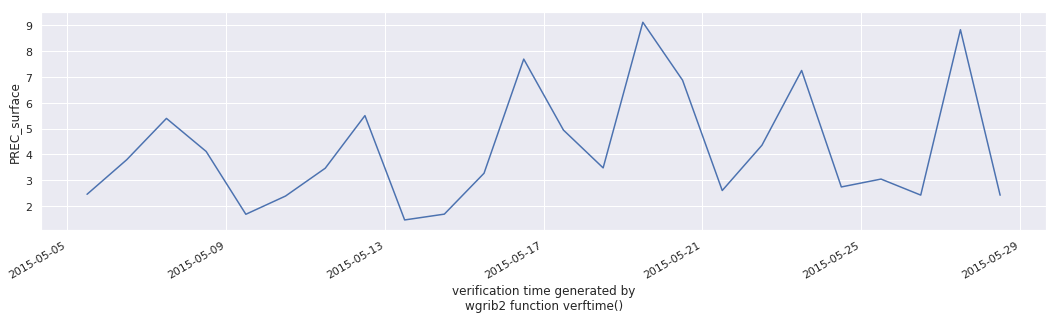

In [47]:
#prec1dGPM = GPM.PREC_surface[0:24,0:-12,295:310].mean(dim=['time', 'latitude', 'longitude'])
prec1dGPM = GPM.PREC_surface[0:24,0:-12,295:310].mean(dim=['longitude','latitude'])
#prec1dGPM.dims
#prec1dGPM.mean(dim=['longitude','latitude'])
prec1dGPM.load()
#pylab.rcParams['figure.figsize'] = (18,4)
prec1dGPM.plot();

In [21]:
#-12 	0 	295 	310
td = GPM.PREC_surface[0:24,0:-12,295:310].mean(dim=['longitude','latitude'])
td.data
td = td.load()
td

<xarray.DataArray 'PREC_surface' (time: 24)>
array([2.451443, 3.791359, 5.391407, 4.112005, 1.677138, 2.383677, 3.461353,
       5.499686, 1.457524, 1.682633, 3.267283, 7.688985, 4.939456, 3.474251,
       9.11596 , 6.872838, 2.597295, 4.351763, 7.247826, 2.736099, 3.040737,
       2.420109, 8.828188, 2.414855], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2015-05-05T12:00:00 ... 2015-05-28T12:00:00

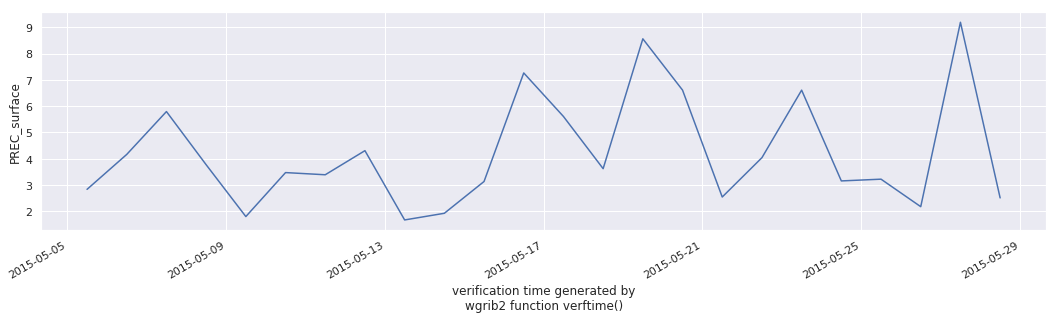

In [20]:
pylab.rcParams['figure.figsize'] = (18,4)
td.plot();
#com a linha de baixo, ele vai plotar a mesma coisa que a linha de cima
#td.rolling(time=25, center=True).mean().plot();